# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types
import math
from scipy.stats import zscore

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
from lifelines.utils import concordance_index
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from imblearn.under_sampling import RandomUnderSampler

# JCOPML Package
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import bayes_search_params as bsp
from jcopml.tuning import grid_search_params as gsp

# **Import Dataset**

In [2]:
train_df = pd.read_csv("data/Features_Train.csv")
test_df = pd.read_csv("data/Features_Test.csv")
train_df

,ID,Annulus_N.voxels,Annulus_SNS_vol,Annulus_SNS_area,Annulus_SNS_s2v,Annulus_SNS_sph,Annulus_SNS_sph_dis,Annulus_SNS_com_1,Annulus_SNS_com_2,Annulus_SNS_max3d,...,Lesion_GLCM_sumEnt_HHH_25HUgl,Lesion_GLCM_difVar_HHH_25HUgl,Lesion_GLCM_difEnt_HHH_25HUgl,Lesion_GLCM_AutoCorrel_HHH_25HUgl,Lesion_GLCM_ClTend_HHH_25HUgl,Lesion_GLCM_Homoge1_HHH_25HUgl,Lesion_GLCM_IDMN_HHH_25HUgl,Lesion_GLCM_IDN_HHH_25HUgl,Lesion_GLCM_invVar_HHH_25HUgl,Outcome
0,0001_1,1504,1504,3364,2.236702,0.188709,5.299155,3.779511,0.006720,21,...,1.456343,0.516489,1.478822,12.359264,1.122325,0.672912,0.972564,0.898164,0.519051,0
1,0003_1,1007,1007,2224,2.208540,0.218459,4.577528,3.334505,0.010426,16,...,1.462379,0.535239,1.502895,12.134616,1.132018,0.675078,0.971933,0.898085,0.502191,0
2,0004_1,2160,2160,4322,2.000926,0.186969,5.348493,4.592921,0.006536,17,...,1.050196,0.245968,0.988000,2.261923,0.527141,0.763604,0.905442,0.842403,0.472791,1
3,0005_1,1568,1568,3276,2.089286,0.199237,5.019137,4.010592,0.007909,23,...,1.157852,0.299988,1.146312,6.241820,0.605958,0.733500,0.965438,0.891646,0.504706,1
4,0006_1,779,779,1702,2.184852,0.240556,4.157036,3.083113,0.013920,14,...,1.414994,0.484908,1.434273,6.282063,1.046868,0.692436,0.964913,0.889447,0.487179,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,0615_1,556,556,1124,2.021583,0.290916,3.437418,2.901721,0.024621,12,...,1.034586,0.239848,0.970242,2.343671,0.523414,0.763506,0.905402,0.842337,0.472988,0
605,0629_1,1087,1087,2036,1.873045,0.251107,3.982361,3.817708,0.015834,15,...,1.156824,0.303016,1.149835,6.254821,0.622207,0.741585,0.966023,0.894674,0.484972,0
606,0639_2,492,492,1056,2.146341,0.285406,3.503776,2.676790,0.023248,14,...,2.556892,7.991275,2.973143,210.145931,15.214457,0.405601,0.979103,0.909242,0.302455,0
607,0646_1,1476,1476,2874,1.947154,0.218133,4.584357,4.119586,0.010379,21,...,1.183595,0.317478,1.182046,6.145671,0.634903,0.726693,0.963519,0.888337,0.509707,1


In [3]:
train_df.drop(columns=['ID'], inplace=True)
test_df.drop(columns=['ID'], inplace=True)

In [4]:
print("\nTotal Missing Value in each feature column :")
print(train_df.isnull().sum())


Total Missing Value in each feature column :
Annulus_N.voxels                  0
Annulus_SNS_vol                   0
Annulus_SNS_area                  0
Annulus_SNS_s2v                   0
Annulus_SNS_sph                   0
                                 ..
Lesion_GLCM_Homoge1_HHH_25HUgl    0
Lesion_GLCM_IDMN_HHH_25HUgl       0
Lesion_GLCM_IDN_HHH_25HUgl        0
Lesion_GLCM_invVar_HHH_25HUgl     0
Outcome                           0
Length: 1999, dtype: int64


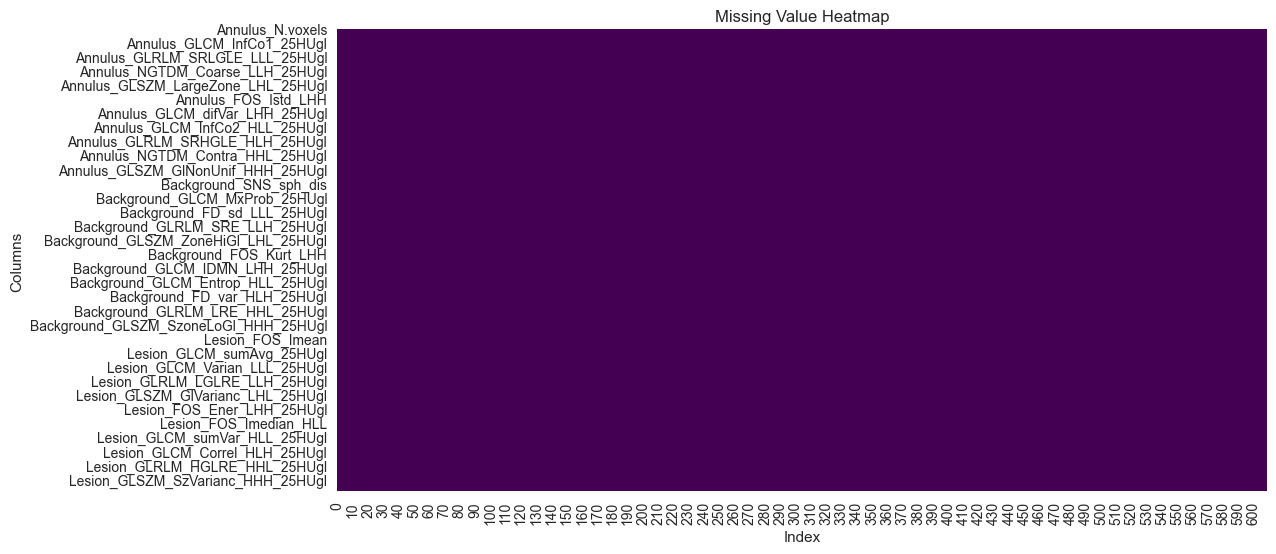

In [5]:
# Check again for validation
train_df_transpose = train_df.T

plt.figure(figsize=(12, 6))
sns.heatmap(train_df_transpose.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.show()

# **EDA**

In [6]:
features = train_df.select_dtypes(include=[np.number])

In [7]:
train_df.columns

Index(['Annulus_N.voxels', 'Annulus_SNS_vol', 'Annulus_SNS_area',
       'Annulus_SNS_s2v', 'Annulus_SNS_sph', 'Annulus_SNS_sph_dis',
       'Annulus_SNS_com_1', 'Annulus_SNS_com_2', 'Annulus_SNS_max3d',
       'Annulus_FOS_CV',
       ...
       'Lesion_GLCM_sumEnt_HHH_25HUgl', 'Lesion_GLCM_difVar_HHH_25HUgl',
       'Lesion_GLCM_difEnt_HHH_25HUgl', 'Lesion_GLCM_AutoCorrel_HHH_25HUgl',
       'Lesion_GLCM_ClTend_HHH_25HUgl', 'Lesion_GLCM_Homoge1_HHH_25HUgl',
       'Lesion_GLCM_IDMN_HHH_25HUgl', 'Lesion_GLCM_IDN_HHH_25HUgl',
       'Lesion_GLCM_invVar_HHH_25HUgl', 'Outcome'],
      dtype='object', length=1999)

In [27]:
train_df.T

,Annulus_N.voxels,Annulus_SNS_vol,Annulus_SNS_area,Annulus_SNS_s2v,Annulus_SNS_sph,Annulus_SNS_sph_dis,Annulus_SNS_com_1,Annulus_SNS_com_2,Annulus_SNS_max3d,Annulus_FOS_CV,...,Lesion_GLCM_sumEnt_HHH_25HUgl,Lesion_GLCM_difVar_HHH_25HUgl,Lesion_GLCM_difEnt_HHH_25HUgl,Lesion_GLCM_AutoCorrel_HHH_25HUgl,Lesion_GLCM_ClTend_HHH_25HUgl,Lesion_GLCM_Homoge1_HHH_25HUgl,Lesion_GLCM_IDMN_HHH_25HUgl,Lesion_GLCM_IDN_HHH_25HUgl,Lesion_GLCM_invVar_HHH_25HUgl,Outcome
0,1504.0,1504.0,3364.0,2.236702,0.188709,5.299155,3.779511,0.006720,21.0,-0.134648,...,1.456343,0.516489,1.478822,12.359264,1.122325,0.672912,0.972564,0.898164,0.519051,0.0
1,1007.0,1007.0,2224.0,2.208540,0.218459,4.577528,3.334505,0.010426,16.0,-0.181334,...,1.462379,0.535239,1.502895,12.134616,1.132018,0.675078,0.971933,0.898085,0.502191,0.0
2,2160.0,2160.0,4322.0,2.000926,0.186969,5.348493,4.592921,0.006536,17.0,-0.137715,...,1.050196,0.245968,0.988000,2.261923,0.527141,0.763604,0.905442,0.842403,0.472791,1.0
3,1568.0,1568.0,3276.0,2.089286,0.199237,5.019137,4.010592,0.007909,23.0,-0.630353,...,1.157852,0.299988,1.146312,6.241820,0.605958,0.733500,0.965438,0.891646,0.504706,1.0
4,779.0,779.0,1702.0,2.184852,0.240556,4.157036,3.083113,0.013920,14.0,-0.566782,...,1.414994,0.484908,1.434273,6.282063,1.046868,0.692436,0.964913,0.889447,0.487179,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,556.0,556.0,1124.0,2.021583,0.290916,3.437418,2.901721,0.024621,12.0,-0.532512,...,1.034586,0.239848,0.970242,2.343671,0.523414,0.763506,0.905402,0.842337,0.472988,0.0
605,1087.0,1087.0,2036.0,1.873045,0.251107,3.982361,3.817708,0.015834,15.0,-0.091998,...,1.156824,0.303016,1.149835,6.254821,0.622207,0.741585,0.966023,0.894674,0.484972,0.0
606,492.0,492.0,1056.0,2.146341,0.285406,3.503776,2.676790,0.023248,14.0,-0.126618,...,2.556892,7.991275,2.973143,210.145931,15.214457,0.405601,0.979103,0.909242,0.302455,0.0
607,1476.0,1476.0,2874.0,1.947154,0.218133,4.584357,4.119586,0.010379,21.0,-0.191775,...,1.183595,0.317478,1.182046,6.145671,0.634903,0.726693,0.963519,0.888337,0.509707,1.0


In [6]:
len(set(train_df.columns))

1999

# **Dataset Splitting**

In [7]:
X = train_df.drop(columns="Outcome")
y = train_df["Outcome"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((487, 1998), (122, 1998), (487,), (122,))

In [8]:
X_train.columns

Index(['Annulus_N.voxels', 'Annulus_SNS_vol', 'Annulus_SNS_area',
       'Annulus_SNS_s2v', 'Annulus_SNS_sph', 'Annulus_SNS_sph_dis',
       'Annulus_SNS_com_1', 'Annulus_SNS_com_2', 'Annulus_SNS_max3d',
       'Annulus_FOS_CV',
       ...
       'Lesion_GLCM_sumVar_HHH_25HUgl', 'Lesion_GLCM_sumEnt_HHH_25HUgl',
       'Lesion_GLCM_difVar_HHH_25HUgl', 'Lesion_GLCM_difEnt_HHH_25HUgl',
       'Lesion_GLCM_AutoCorrel_HHH_25HUgl', 'Lesion_GLCM_ClTend_HHH_25HUgl',
       'Lesion_GLCM_Homoge1_HHH_25HUgl', 'Lesion_GLCM_IDMN_HHH_25HUgl',
       'Lesion_GLCM_IDN_HHH_25HUgl', 'Lesion_GLCM_invVar_HHH_25HUgl'],
      dtype='object', length=1998)

# **Pipeline**

In [9]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="robust"), X_train.columns),
    # ('categoric', cat_pipe(encoder="onehot"), ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 
     #                                           'Road_Light_Condition']),
])

# **Training**

## **Without Hyperparameter Tunnning**

In [15]:
knn = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier(n_neighbors=5))
])

print(knn.fit(X_train, y_train))
print(knn.score(X_train, y_train))
print(knn.score(X_val, y_val))

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Annulus_N.voxels', 'Annulus_SNS_vol', 'Annulus_SNS_area',
       'Annulus_SNS_s2v', 'Annulus_SNS_sph', 'Annulus_SNS_sph_dis',
       'Annulus_SNS_com_1', 'Annulus_SNS_com_2', 'Annulus_SNS_max3d',
       'Annulus_FOS_...
       'Lesion_GLCM_sumVar_HHH_25HUgl', 'Lesion_GLCM_sumEnt_HHH_25HUgl',
       'Lesion_GLCM_difVar_HHH_25HUgl', 'Lesion_GLCM_difEnt_HHH_25HUgl',
       'Lesion_GLCM_AutoCorrel_HHH_25HUgl', 'Lesion_GLCM_ClTend_HHH_25HUgl',
       'Lesion_GLCM_Homoge1_HHH_25HUgl', 'Lesion_GLCM_IDMN_HHH_25HUgl'

In [16]:
rf = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

print(rf.fit(X_train, y_train))
print(rf.score(X_train, y_train))
print(rf.score(X_val, y_val))

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Annulus_N.voxels', 'Annulus_SNS_vol', 'Annulus_SNS_area',
       'Annulus_SNS_s2v', 'Annulus_SNS_sph', 'Annulus_SNS_sph_dis',
       'Annulus_SNS_com_1', 'Annulus_SNS_com_2', 'Annulus_SNS_max3d',
       'Annulus_FOS_...
       'Lesion_GLCM_sumVar_HHH_25HUgl', 'Lesion_GLCM_sumEnt_HHH_25HUgl',
       'Lesion_GLCM_difVar_HHH_25HUgl', 'Lesion_GLCM_difEnt_HHH_25HUgl',
       'Lesion_GLCM_AutoCorrel_HHH_25HUgl', 'Lesion_GLCM_ClTend_HHH_25HUgl',
       'Lesion_GLCM_Homoge1_HHH_25HUgl', 'Lesion_GLCM_IDMN_HHH_25HUgl'

In [17]:
xgb = Pipeline([
    ("prep", preprocessor),
    ("algo",XGBClassifier())
])

print(xgb.fit(X_train, y_train))
print(xgb.score(X_train, y_train))
print(xgb.score(X_val, y_val))

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Annulus_N.voxels', 'Annulus_SNS_vol', 'Annulus_SNS_area',
       'Annulus_SNS_s2v', 'Annulus_SNS_sph', 'Annulus_SNS_sph_dis',
       'Annulus_SNS_com_1', 'Annulus_SNS_com_2', 'Annulus_SNS_max3d',
       'Annulus_FOS_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
         

In [18]:
print("KNN Evaluation : ")
y_val_pred_knn = knn.predict(X_val)
report_knn = classification_report(y_val, y_val_pred_knn)
print("Classification Report:")
print(report_knn)

cm_knn = confusion_matrix(y_val, y_val_pred_knn)
print("\nConfusion Matrix KNN :")
print(cm_knn)
print("KNN Evaluation :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_knn, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_knn, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_knn, average='macro', zero_division=0):.4f}")


print("\n")
print("Random Forest Evaluation : ")
y_val_pred_rf = rf.predict(X_val)
report_rf = classification_report(y_val, y_val_pred_rf)
print("Classification Report:")
print(report_rf)

cm_rf = confusion_matrix(y_val, y_val_pred_rf)
print("\nConfusion Matrix Random Forest :")
print(cm_rf)
print("\nRandom Forest Evaluation :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_rf, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_rf, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_rf, average='macro', zero_division=0):.4f}")


print("\n")
print("XGB Forest Evaluation : ")
y_val_pred_xgb = xgb.predict(X_val)
report_xgb = classification_report(y_val, y_val_pred_xgb)
print("Classification Report:")
print(report_xgb)

cm_xgb = confusion_matrix(y_val, y_val_pred_xgb)
print("\nConfusion Matrix Random Forest :")
print(cm_xgb)
print("\nRandom Forest Evaluation :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_xgb, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_xgb, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_xgb, average='macro', zero_division=0):.4f}")

KNN Evaluation : 
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        61
           1       0.72      0.69      0.71        61

    accuracy                           0.71       122
   macro avg       0.71      0.71      0.71       122
weighted avg       0.71      0.71      0.71       122


Confusion Matrix KNN :
[[45 16]
 [19 42]]
KNN Evaluation :
Precision (macro): 0.7136
Recall (macro): 0.7131
F1-Score (macro): 0.7129


Random Forest Evaluation : 
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        61
           1       0.89      0.77      0.82        61

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122


Confusion Matrix Random Forest :
[[55  6]
 [14 47]]

Random Forest Evaluation :
Precision (macro): 0.8419
Recall (mac

## **With Hyperparameter Tunnning**

### Randomized Search CV

In [19]:
knn_random = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

model_knn_random = RandomizedSearchCV(knn_random, rsp.knn_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_knn_random.fit(X_train, y_train)

print(model_knn_random.best_params_)
print(model_knn_random.score(X_train, y_train), model_knn_random.best_score_, model_knn_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__n_neighbors': 20, 'algo__p': 1.1958902479192646, 'algo__weights': 'distance'}
1.0 0.7453818640858405 0.7786885245901639


In [20]:
rf_random = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_random = RandomizedSearchCV(rf_random, rsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_random.fit(X_train, y_train)

print(model_rf_random.best_params_)
print(model_rf_random.score(X_train, y_train), model_rf_random.best_score_, model_rf_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__max_depth': 79, 'algo__max_features': 0.7657556646104192, 'algo__min_samples_leaf': 10, 'algo__n_estimators': 136}
0.9055441478439425 0.7639175257731958 0.7868852459016393


In [21]:
xgb_random = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier())
])

model_xgb_random = RandomizedSearchCV(xgb_random , rsp.xgb_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_xgb_random.fit(X_train, y_train)

print(model_xgb_random.best_params_)
print(model_xgb_random.score(X_train, y_train), model_xgb_random.best_score_, model_xgb_random.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__colsample_bytree': 0.5625714329683081, 'algo__gamma': 2, 'algo__learning_rate': 0.07585357717887349, 'algo__max_depth': 9, 'algo__n_estimators': 164, 'algo__reg_alpha': 0.05458791984149444, 'algo__reg_lambda': 4.066349232527406, 'algo__subsample': 0.4265869320779685}
0.9856262833675564 0.7680622764569746 0.819672131147541


In [22]:
print("KNN Evaluation Tunning with Randomized Search CV : ")
knn_tunning_randomized = model_knn_random.best_estimator_
y_val_pred_knn_tunning_random = knn_tunning_randomized.predict(X_val)
report_knn_tunning_random = classification_report(y_val, y_val_pred_knn_tunning_random)
print("Classification Report:")
print(report_knn_tunning_random)

cm_knn_tunning_random = confusion_matrix(y_val, y_val_pred_knn_tunning_random)
print("\nConfusion Matrix KNN Tunning with Randomized Search CV :")
print(cm_knn_tunning_random)
print("KNN Evaluation :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_knn_tunning_random, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_knn_tunning_random, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_knn_tunning_random, average='macro', zero_division=0):.4f}")


print("\n")
print("Random Forest Evaluation Tunning with Randomized Search CV : ")
rf_tunning_randomized = model_rf_random.best_estimator_
y_val_pred_rf_tunning_random = rf_tunning_randomized.predict(X_val)
report_rf_tunning_random = classification_report(y_val, y_val_pred_rf_tunning_random)
print("Classification Report:")
print(report_rf_tunning_random)

cm_rf_tunning_random = confusion_matrix(y_val, y_val_pred_rf_tunning_random)
print("\nConfusion Matrix Random Forest :")
print(cm_rf_tunning_random)
print("\nRandom Forest Evaluation Tunning with Randomized Search CV :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_rf_tunning_random, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_rf_tunning_random, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_rf_tunning_random, average='macro', zero_division=0):.4f}")


print("\n")
print("XGB Evaluation Tunning with Randomized Search CV : ")
xgb_tunning_randomized = model_xgb_random.best_estimator_
y_val_pred_xgb_tunning_random = xgb_tunning_randomized.predict(X_val)
report_xgb_tunning_random = classification_report(y_val, y_val_pred_xgb_tunning_random)
print("Classification Report:")
print(report_xgb_tunning_random)

cm_xgb_tunning_random = confusion_matrix(y_val, y_val_pred_xgb_tunning_random)
print("\nConfusion Matrix XGB Tunning with Randomized Search CV :")
print(cm_xgb_tunning_random)
print("\nRandom Forest Evaluation :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_xgb_tunning_random, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_xgb_tunning_random, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_xgb_tunning_random, average='macro', zero_division=0):.4f}")

KNN Evaluation Tunning with Randomized Search CV : 
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        61
           1       0.78      0.77      0.78        61

    accuracy                           0.78       122
   macro avg       0.78      0.78      0.78       122
weighted avg       0.78      0.78      0.78       122


Confusion Matrix KNN Tunning with Randomized Search CV :
[[48 13]
 [14 47]]
KNN Evaluation :
Precision (macro): 0.7788
Recall (macro): 0.7787
F1-Score (macro): 0.7787


Random Forest Evaluation Tunning with Randomized Search CV : 
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        61
           1       0.84      0.70      0.77        61

    accuracy                           0.79       122
   macro avg       0.79      0.79      0.79       122
weighted avg       0.79      0.79      0.79       122


Confusion Matri

### Bayesian Optimizer/BayesSearch CV

In [18]:
bsp.knn_params

{'algo__n_neighbors': Integer(low=1, high=40, prior='uniform', transform='identity'),
 'algo__weights': Categorical(categories=('uniform', 'distance'), prior=None),
 'algo__p': Real(low=1, high=2, prior='uniform', transform='identity')}

In [29]:
knn_bayes = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

model_knn_bayes = BayesSearchCV(knn_bayes, bsp.knn_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_knn_bayes.fit(X_train, y_train)

print(model_knn_bayes.best_params_)
print(model_knn_bayes.score(X_train, y_train), model_knn_bayes.best_score_, model_knn_bayes.score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [27]:
bsp.rf_params

{'algo__n_estimators': Integer(low=100, high=200, prior='uniform', transform='normalize'),
 'algo__max_depth': Integer(low=20, high=80, prior='uniform', transform='normalize'),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform', transform='normalize'),
 'algo__min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize')}

In [24]:
rf_bayes = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_bayes = BayesSearchCV(rf_bayes, bsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_bayes.fit(X_train, y_train)

print(model_rf_bayes.best_params_)
print(model_rf_bayes.score(X_train, y_train), model_rf_bayes.best_score_, model_rf_bayes.score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [26]:
bsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10, prior='uniform', transform='normalize'),
 'algo__learning_rate': Real(low=0.01, high=1, prior='log-uniform', transform='normalize'),
 'algo__n_estimators': Integer(low=100, high=200, prior='uniform', transform='normalize'),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform', transform='normalize'),
 'algo__gamma': Integer(low=1, high=10, prior='uniform', transform='normalize'),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform', transform='normalize'),
 'algo__reg_alpha': Real(low=0.001, high=10, prior='log-uniform', transform='normalize'),
 'algo__reg_lambda': Real(low=0.001, high=10, prior='log-uniform', transform='normalize')}

In [25]:
xgb_bayes = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier())
])

model_xgb_bayes = BayesSearchCV(xgb_bayes, bsp.xgb_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_xgb_bayes.fit(X_train, y_train)

print(model_xgb_bayes.best_params_)
print(model_xgb_bayes.score(X_train, y_train), model_xgb_bayes.best_score_, model_xgb_bayes.score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [31]:
print("KNN Evaluation Tunning with Bayes Search CV : ")
knn_tunning_bayes = model_knn_bayes.best_estimator_
y_val_pred_knn_tunning_bayes = knn_tunning_bayes.predict(X_val)
report_knn_tunning_bayes = classification_report(y_val, y_val_pred_knn_tunning_bayes)
print("Classification Report:")
print(report_knn_tunning_bayes)

cm_knn_tunning_bayes = confusion_matrix(y_val, y_val_pred_knn_tunning_bayes)
print("\nConfusion Matrix KNN Tunning with Bayes Search CV :")
print(cm_knn_tunning_bayes)
print("KNN Evaluation :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_knn_tunning_bayes, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_knn_tunning_bayes, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_knn_tunning_bayes, average='macro', zero_division=0):.4f}")


print("\n")
print("Random Forest Evaluation Tunning with Bayes Search CV : ")
rf_tunning_bayes = model_rf_bayes.best_estimator_
y_val_pred_rf_tunning_bayes = rf_tunning_bayes.predict(X_val)
report_rf_tunning_bayes = classification_report(y_val, y_val_pred_rf_tunning_bayes)
print("Classification Report:")
print(report_rf_tunning_bayes)

cm_rf_tunning_bayes = confusion_matrix(y_val, y_val_pred_rf_tunning_bayes)
print("\nConfusion Matrix Random Forest :")
print(cm_rf_tunning_bayes)
print("\nRandom Forest Evaluation Tunning with Bayes Search CV :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_rf_tunning_bayes, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_rf_tunning_bayes, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_rf_tunning_bayes, average='macro', zero_division=0):.4f}")


print("\n")
print("XGB Evaluation Tunning with Bayes Search CV : ")
xgb_tunning_bayes = model_xgb_bayes.best_estimator_
y_val_pred_xgb_tunning_bayes = xgb_tunning_bayes.predict(X_val)
report_xgb_tunning_bayes = classification_report(y_val, y_val_pred_xgb_tunning_bayes)
print("Classification Report:")
print(report_xgb_tunning_bayes)

cm_xgb_tunning_bayes = confusion_matrix(y_val, y_val_pred_xgb_tunning_bayes)
print("\nConfusion Matrix XGB Tunning with Bayes Search CV :")
print(cm_xgb_tunning_bayes)
print("\nXGB Evaluation :")
print(f"Precision (macro): {precision_score(y_val, y_val_pred_xgb_tunning_bayes, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_val, y_val_pred_xgb_tunning_bayes, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_val, y_val_pred_xgb_tunning_bayes, average='macro', zero_division=0):.4f}")

KNN Evaluation Tunning with Bayes Search CV : 
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        61
           1       0.76      0.77      0.76        61

    accuracy                           0.76       122
   macro avg       0.76      0.76      0.76       122
weighted avg       0.76      0.76      0.76       122


Confusion Matrix KNN Tunning with Bayes Search CV :
[[46 15]
 [14 47]]
KNN Evaluation :
Precision (macro): 0.7624
Recall (macro): 0.7623
F1-Score (macro): 0.7623


Random Forest Evaluation Tunning with Bayes Search CV : 
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.86      0.72      0.79        61

    accuracy                           0.80       122
   macro avg       0.81      0.80      0.80       122
weighted avg       0.81      0.80      0.80       122


Confusion Matrix Random Forest